### Mall customer dataset
In deze notebook gaan we clustering toepassen en bekijken aan de hand van de mall customers dataset. Het doel van clustering is het maken van groepen datapunten die gelijkenissen vertonen in de features. In dit notbook maken we gebruik van de K-means clustering.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

In [62]:
data = pd.read_csv("../dataset/mall_customers.csv")

data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Als eerst gaan we de data opschonen en vervolgens, passen we de "Elbow Method" toe, met deze methode varieren we de waarde van K, in dit geval met (K = 1 t/m 10), voor elke waarde van k wordt dan de "within-cluster sum of square (WCSS)" berekent. Naar maten de K een hogere waarde aaanneemt zal de wcss waarde zakken, en op een bepaald punt neemt de afname af (Elbow point). 

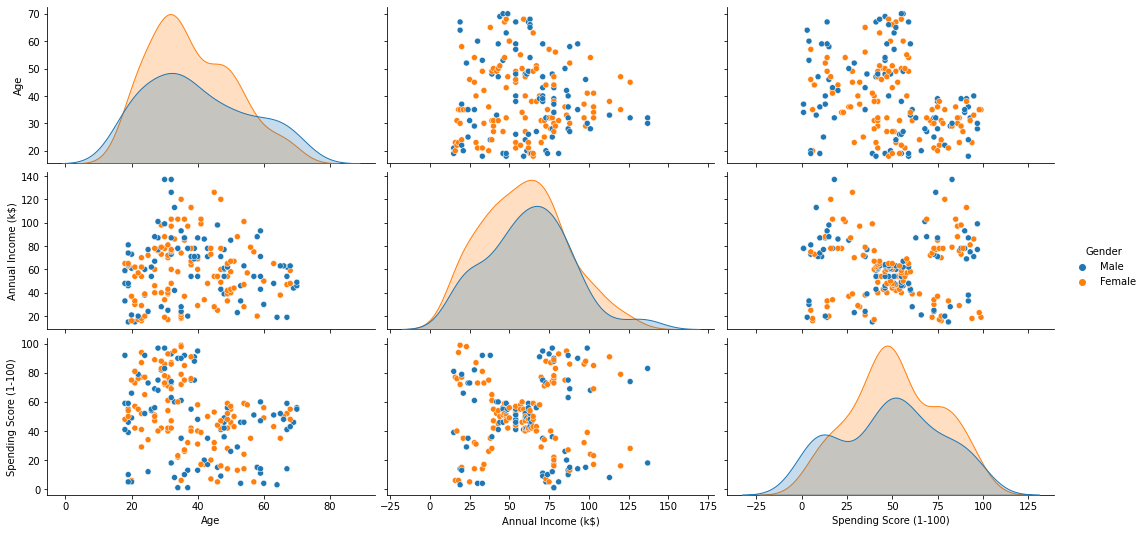

In [63]:
X = data.iloc[:, [3, 4]].values

sns.pairplot(data.drop('CustomerID', axis=1), aspect=2, hue='Gender')
plt.show()


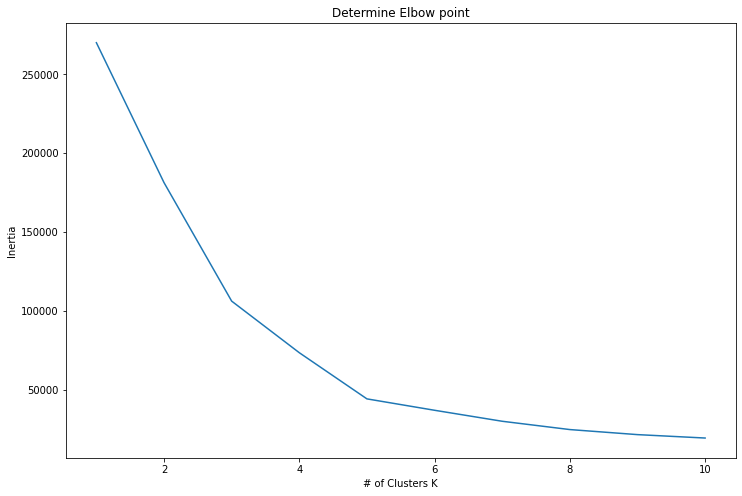

In [64]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 420).fit(X)
    clusters.append(km.inertia_)
    
fig, axis = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=axis)
axis.set_title('Determine Elbow point')
axis.set_xlabel('# of Clusters K')
axis.set_ylabel('Inertia')

plt.show()

We kunnen zien in de grafiek dat het elbow point zich toont op k = 5. 

In [65]:
km = KMeans(n_clusters = 5, random_state = 420).fit(X)
y_kmeans = km.fit_predict(X)

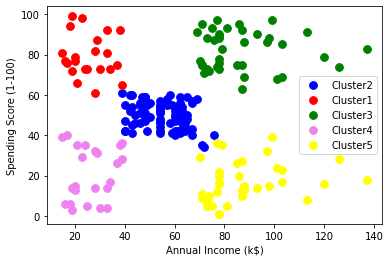

In [69]:
# Visualising the clusters
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4') 
plt.scatter( X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend()

plt.show()